# Foundations for Statistical Inference

## Sampling Distributions
Copied and adapted from OpenStats Intro ["Foundations for statistical inference - Sampling distributions" lab](http://htmlpreview.github.io/?https://github.com/andrewpbray/oiLabs-base-R/blob/master/sampling_distributions/sampling_distributions.html), a product of OpenIntro that is released under a [Creative Commons Attribution-ShareAlike 3.0 Unported](http://creativecommons.org/licenses/by-sa/3.0). Original lab written for OpenIntro by Andrew Bray and Mine Çetinkaya-Rundel.

In this lab, we investigate the ways in which the statistics from a random sample of data can serve as point estimates for population parameters. We’re interested in formulating a sampling distribution of our estimate in order to learn about the properties of the estimate, such as its distribution. The [data set](https://www.openintro.org/stat/data/?data=ames) is all residential home sales in Ames, Iowa 2006-2010. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# from __future__ import print_function # Python 2 users, uncomment this statement

## The data
We consider real estate data from the city of Ames, Iowa. The details of every real estate transaction in Ames is recorded by the City Assessor’s office. Our particular focus for this lab will be all residential home sales in Ames between 2006 and 2010. This collection represents our population of interest. In this lab we would like to learn about these home sales by taking smaller samples from the full population. Let’s load the data.

In [2]:
# load data into dataframe
ames = pd.read_csv("https://www.openintro.org/stat/data/ames.csv")
ames.head()

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


We see that there are quite a few variables in the data set, enough to do a very in-depth analysis. For this lab, we’ll restrict our attention to just two of the variables: the above ground living area of the house in square feet (`Gr.Liv.Area`) and the sale price (`SalePrice`). To save some effort throughout the lab, create two variables with short names that represent these two variables. We will also remove the the periods from all the column names.

In [3]:
# remove special characters from variable names
ames.columns = [c.replace(".","") for c in ames.columns]
area = ames["GrLivArea"]
price = ames["SalePrice"]

In [13]:
ames[['GrLivArea', 'SalePrice']]

,GrLivArea,SalePrice
0,1656,215000
1,896,105000
2,1329,172000
3,2110,244000
4,1629,189900
5,1604,195500
6,1338,213500
7,1280,191500
8,1616,236500
9,1804,189000


Let’s look at the distribution of area in our population of home sales by calculating a few summary statistics and making a histogram.

In [10]:
area.describe()

count    2930.000000
mean     1499.690444
std       505.508887
min       334.000000
25%      1126.000000
50%      1442.000000
75%      1742.750000
max      5642.000000
Name: GrLivArea, dtype: float64

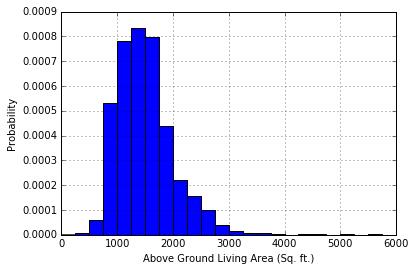

In [16]:
area.hist(bins=range(0,6000,250), normed=True)
plt.xlabel("Above Ground Living Area (Sq. ft.)")
plt.ylabel("Probability")

### Exercise 1
Describe the population distribution of above ground living area (shown above).

_Weighted to the left. There is more variation in home sizes above the mean. Below the mean, it drops of more dramatically._

## The unknown sampling distribution
This example has the whole population of interest, but usually we do not have access to the population data and depend on sample data. Because of this, we often take a sample of the population and use that to understand the properties of the population.

If we were interested in estimating the mean living area in Ames based on a sample, we can use the following command to survey the population.

In [17]:
samp1 = area.sample(50)

This command collects a simple random sample of size 50 from the pandas.Series `area`, which is assigned to `samp1`. This is like going into the City Assessor’s database and pulling up the files on 50 random home sales. Working with these 50 files would be considerably simpler than working with all 2930 home sales.

In [18]:
samp1

270     1668
762     1200
1727    1496
1887    1187
2153    1992
899     1678
2409    1405
304     1128
2724    1437
1946    1034
1436    1652
1329     935
543     2122
2259    1689
1585    2262
228     2260
467     1560
1420    1626
1411     864
1500    1152
974      874
1168    1310
2173     816
1095    1414
314     1687
2209    1958
1065    2046
2610    1207
1721    1370
1075    1342
623     1453
2281    1632
2048     999
890     1125
2818    1220
854      914
810     1535
2606    1324
1211    1092
921     1308
2372     987
1515    1716
327      945
612     1576
1452     780
1422    2037
1162    1200
106      788
590     1334
1105    2113
Name: GrLivArea, dtype: int64

### Exercise 2
Describe the distribution of this sample. How does it compare to the distribution of the population?

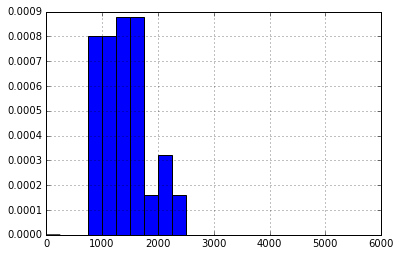

In [22]:
samp1.hist(bins=range(0,6000,250), normed=True)

_Still pulled to the left_

If we’re interested in estimating the average living area in homes in Ames using the sample, our best single guess is the sample mean.

In [23]:
samp1.mean()

1408.98

In [27]:
np.version.full_version

'1.11.1'

In [28]:
pd.__version__

'0.18.1'

Depending on which 50 homes you selected, your estimate could be a bit above or a bit below the true population mean of 1499.69 square feet. In general, though, the sample mean turns out to be a pretty good estimate of the average living area, and we were able to get it by sampling less than 3% of the population.

### Exercise 3
Take a second sample, also of size 50, and call it `samp2`. How does the mean of `samp2` compare with the mean of `samp1`? Suppose we took two more samples, one of size 100 and one of size 1000. Which would you think would provide a more accurate estimate of the population mean?

In [29]:
samp2 = area.sample(50)
samp3 = area.sample(50)

In [34]:
samp1.mean(), samp2.mean(), samp3.mean(), area.mean()

(1408.98, 1529.44, 1396.56, 1499.6904436860068)

Not surprisingly, every time we take another random sample, we get a different sample mean. It’s useful to get a sense of just how much variability we should expect when estimating the population mean this way. The distribution of sample means, called the *sampling distribution*, can help us understand this variability. In this lab, because we have access to the population, we can build up the sampling distribution for the sample mean by repeating the above steps many times. Here we will generate 5000 samples and compute the sample mean of each.

(array([   23.,   163.,   680.,  1385.,  1382.,   930.,   337.,    84.,
           14.,     2.]),
 array([ 1269.34 ,  1324.326,  1379.312,  1434.298,  1489.284,  1544.27 ,
         1599.256,  1654.242,  1709.228,  1764.214,  1819.2  ]),
 <a list of 10 Patch objects>)

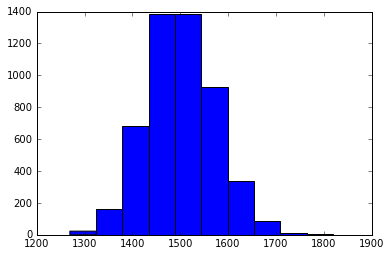

In [35]:
# Generate 5000 samples and compute the mean of each to build a sampling distribution
# for the sample mean.
n = 50
n_samples = 5000
sample_means50 = [area.sample(n).mean() for i in range(n_samples)]
plt.hist(sample_means50)

If you would like to adjust the bin width of your histogram to show a little more detail, you can do so by changing the `bins` argument.

(array([   2.,   13.,   20.,   48.,  103.,  188.,  279.,  424.,  553.,
         621.,  578.,  564.,  484.,  377.,  309.,  184.,  114.,   66.,
          38.,   19.,   11.,    2.,    1.,    1.,    1.]),
 array([ 1269.34  ,  1291.3344,  1313.3288,  1335.3232,  1357.3176,
         1379.312 ,  1401.3064,  1423.3008,  1445.2952,  1467.2896,
         1489.284 ,  1511.2784,  1533.2728,  1555.2672,  1577.2616,
         1599.256 ,  1621.2504,  1643.2448,  1665.2392,  1687.2336,
         1709.228 ,  1731.2224,  1753.2168,  1775.2112,  1797.2056,  1819.2   ]),
 <a list of 25 Patch objects>)

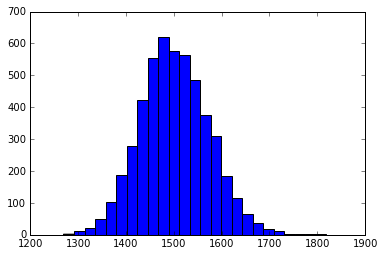

In [36]:
plt.hist(sample_means50, bins=25)

In [44]:
np.median(sorted(sample_means50))

1498.4400000000001

Here we take 5000 samples of size 50 from the population, calculate the mean of each sample, and store each result in a list called `sample_means50`.

### Exercise 4
How many elements are there in `sample_means50`? Describe the sampling distribution, and be sure to specifically note its center. Would you expect the distribution to change if we instead collected 50,000 sample means?

_It is starting to look more symetrical and like the normal distribution. The center (median of values sorted) is very close to the median of the whole population (1498 vs 1499). The more samples we collect the closer to normal the shape should be._

### Exercise 5
Create a variable named `sample_means_small` containing the sample means from 100 samples each of size 50. Print the variable to the screen. How many elements are there in this object called `sample_means_small`? What does each element represent?

In [45]:
sample_means_small = [area.sample(50) for i in range(100)]

In [48]:
len(sample_means_small)

100

_There are 100 elements in samplemeanssmall. Each is a Series containing 50 random samples from our area population (the whole dataset)_

## Sample size and the samping distribution

The sampling distribution that we computed tells us much about estimating the average living area in homes in Ames. Because the sample mean is an unbiased estimator, the sampling distribution is centered at the true average living area of the the population, and the spread of the distribution indicates how much variability is induced by sampling only 50 home sales.

To get a sense of the effect that sample size has on our distribution, let’s build up two more sampling distributions: one based on a sample size of 10 and another based on a sample size of 100.

In [50]:
# Generate sampling distributions with different sample sizes.
sample_sizes = [10, 50, 100]
n_samples = 5000
sample_means = {}
for n in sample_sizes:
    sample_means[n] = [area.sample(n).mean() for i in range(n_samples)]

To see the effect that different sample sizes have on the sampling distribution, plot the three distributions on top of one another.

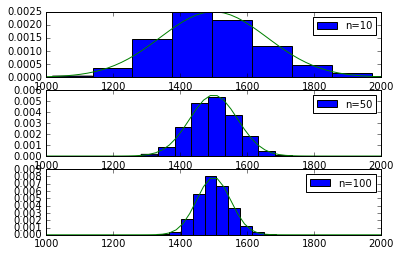

In [56]:
def _gauss(x, mu=0, sigma=1):
    return 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-0.5*pow((x-mu)/sigma,2))
gauss = np.vectorize(_gauss)


fig = plt.figure()
xlim = [1000, 2000] 

sigma = area.std()
mu = area.mean()
dx = np.linspace(*xlim)

for i,n in enumerate(sample_sizes):
    g = fig.add_subplot(3, 1, i+1)
    g.hist(sample_means[n], label="n={:n}".format(n), normed=True)
    g.plot(dx, gauss(dx, mu, sigma/np.sqrt(n)))
    g.set_xlim(*xlim)
    g.legend(loc="upper right", fontsize=10)


In [54]:
dx

array([ 1000.        ,  1020.40816327,  1040.81632653,  1061.2244898 ,
        1081.63265306,  1102.04081633,  1122.44897959,  1142.85714286,
        1163.26530612,  1183.67346939,  1204.08163265,  1224.48979592,
        1244.89795918,  1265.30612245,  1285.71428571,  1306.12244898,
        1326.53061224,  1346.93877551,  1367.34693878,  1387.75510204,
        1408.16326531,  1428.57142857,  1448.97959184,  1469.3877551 ,
        1489.79591837,  1510.20408163,  1530.6122449 ,  1551.02040816,
        1571.42857143,  1591.83673469,  1612.24489796,  1632.65306122,
        1653.06122449,  1673.46938776,  1693.87755102,  1714.28571429,
        1734.69387755,  1755.10204082,  1775.51020408,  1795.91836735,
        1816.32653061,  1836.73469388,  1857.14285714,  1877.55102041,
        1897.95918367,  1918.36734694,  1938.7755102 ,  1959.18367347,
        1979.59183673,  2000.        ])

### Exercise 6
When the sample size is larger, what happens to the center? What about the spread?

### Exercise 7

So far, we have only focused on estimating the mean living area in homes in Ames. Now you’ll try to estimate the mean home price.

1. Take a random sample of size 50 from `price`. Using this sample, what is your best point estimate of the population mean?

2. Since you have access to the population, simulate the sampling distribution for $\bar{x}_{price}$ by taking 5000 samples from the population of size 50 and computing 5000 sample means. Store these means in a vector called `sample_means50`. Plot the data, then describe the shape of this sampling distribution. Based on this sampling distribution, what would you guess the mean home price of the population to be? Finally, calculate and report the population mean.

3. Change your sample size from 50 to 150, then compute the sampling distribution using the same method as above, and store these means in a new vector called `sample_means150`. Describe the shape of this sampling distribution, and compare it to the sampling distribution for a sample size of 50. Based on this sampling distribution, what would you guess to be the mean sale price of homes in Ames?

4. Of the sampling distributions from 2 and 3, which has a smaller spread? If we’re concerned with making estimates that are more often close to the true value, would we prefer a distribution with a large or small spread?

In [60]:
price_sample = price.sample(50)
"Best Point Estimate:", price_sample.mean()

('Best Point Estimate:', 187946.24)

In [61]:
sample_means_50 = [price.sample(50).mean() for i in range(5000)]

(array([   33.,   284.,   941.,  1523.,  1314.,   629.,   224.,    40.,
            9.,     3.]),
 array([ 146597.82 ,  155416.982,  164236.144,  173055.306,  181874.468,
         190693.63 ,  199512.792,  208331.954,  217151.116,  225970.278,
         234789.44 ]),
 <a list of 10 Patch objects>)

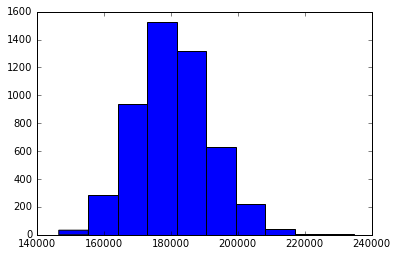

In [71]:
plt.hist(sample_means_50)

In [65]:
"Best guess at mean:", np.median(sorted(sample_means_50))

('Best guess at mean:', 180270.88)

In [66]:
"Real mean:", price.mean()

('Real mean:', 180796.0600682594)

In [67]:
sample_means_150 = [price.sample(150).mean() for i in range(5000)]

In [68]:
"Best guess at mean:", np.median(sorted(sample_means_150))

('Best guess at mean:', 180627.99333333335)

(array([    6.,    55.,   350.,  1007.,  1415.,  1283.,   645.,   194.,
           41.,     4.]),
 array([ 157342.5       ,  162213.86333333,  167085.22666667,
         171956.59      ,  176827.95333333,  181699.31666667,
         186570.68      ,  191442.04333333,  196313.40666667,
         201184.77      ,  206056.13333333]),
 <a list of 10 Patch objects>)

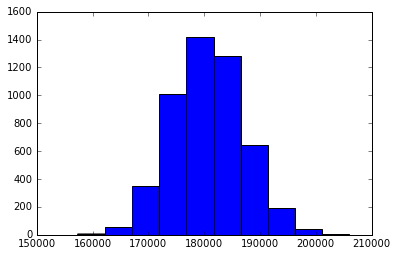

In [70]:
plt.hist(sample_means_150)

# Confidence Intervals

Copied and adapted from OpenStats Intro ["Foundations for statistical inference - Confidence intervals" lab](http://htmlpreview.github.io/?https://github.com/andrewpbray/oiLabs-base-R/blob/master/confidence_intervals/confidence_intervals.html), a product of OpenIntro that is released under a [Creative Commons Attribution-ShareAlike 3.0 Unported](http://creativecommons.org/licenses/by-sa/3.0). Original lab written for OpenIntro by Andrew Bray and Mine Çetinkaya-Rundel.

## Sampling from Ames, Iowa

If you have access to data on an entire population, say the size of every house in Ames, Iowa, it’s straight forward to answer questions like, “How big is the typical house in Ames?” and “How much variation is there in sizes of houses?”. If you have access to only a sample of the population, as is often the case, the task becomes more complicated. What is your best guess for the typical size if you only know the sizes of several dozen houses? This sort of situation requires that you use your sample to make inference on what your population looks like.

## The data

In this lab we’ll start with a simple random sample of size 60 from the population. Specifically, this is a simple random sample of size 60. Note that the data set has information on many housing variables, but for the first portion of the lab we’ll focus on the size of the house, represented by the variable `GrLivArea`.

In [72]:
population = ames["GrLivArea"]
samp = population.sample(60)

### Exercise 1
Describe the distribution of your sample. What would you say is the “typical” size within your sample? Also state precisely what you interpreted “typical” to mean.

### Exercise 2
Would you expect another student’s distribution to be identical to yours? Would you expect it to be similar? Why or why not?

## Confidence intervals
One of the most common ways to describe the typical or central value of a distribution is to use the mean. In this case we can calculate the mean of the sample using,

In [ ]:
sample_mean = samp.mean()

In [85]:
lambda x: (x.mean(), x.std())

<function __main__.<lambda>>

Return for a moment to the question that first motivated this lab: based on this sample, what can we infer about the population? Based only on this single sample, the best estimate of the average living area of houses sold in Ames would be the sample mean, usually denoted as $\bar{x}$ (here we’re calling it `sample_mean`). That serves as a good point estimate but it would be useful to also communicate how uncertain we are of that estimate. This can be captured by using a *confidence interval*.

We can calculate a 95% confidence interval for a sample mean by adding and subtracting 1.96 standard errors to the point estimate (See Section 4.2.3 if you are unfamiliar with this formula).

### Exercise 3
1. Calculate the sample mean, $\bar{x}$. This is a point estimate of the population mean. Calculate the 95% confidence interval of this estimate using the formula $\bar{x} \pm 1.96 \times SE$ where the standard error $SE = \frac{\sigma}{\sqrt{n}} \approx \frac{s}{\sqrt{n}}$ (equations 4.12 and 4.4 in [OpenIntro Statistics](https://www.openintro.org/stat/textbook.php}). This is an important inference that we’ve just made: even though we don’t know what the full population looks like, we’re 95% confident that the true average size of houses in Ames lies between the values lower and upper. There are a few conditions that must be met for this interval to be valid.

2. For the confidence interval to be valid, the sample mean must be normally distributed and have standard error $\frac{s}{\sqrt{n}}$ What conditions must be met for this to be true?

## Confidence levels

### Exercise 4
What does "95% confidence" mean? (See [OpenIntro Statistics](https://www.openintro.org/stat/textbook.php) section 4.2.2)

### Exercise 5
Calculate the population mean. Does your confidence interval capture the true average size of houses in Ames? Does your neighbor's interval capture this value?

### Exercise 6
Each student in the class should have gotten a slightly different confidence interval. What proportion of those intervals would you expect to capture the true population mean? Why? Collect data on the intervals created by other students in the class and calculate the proportion of intervals that capture the true population mean.

### Exercise 7
Write a for-loop or list comprehension thats selects a random sample of size 60, then calculates and stores the sample's mean and standard deviation, for a total of 50 samples. Use the stored statistics to calculate 95% confidence intervals for the 50 random samples. Is the population mean captured in every confidence interval?
    

### Exercise 8
1. Use the following function to visualize all the confidence intervals. What proportion of the confidence intervals you calculated include the true population mean? Is this proportion exactly equal to the confidence level? If not, explain why.
2. Pick a confidence level of your choosing, provided it is not 95%. What is the appropriate critical value?
3. Calculate 50 confidence intervals at the confidence level you chose in the previous question. You do not need to obtain new samples, simply calculate new intervals based on the sample means and standard deviations you have already collected. Using the plot_ci function, plot all intervals and calculate the proportion of intervals that include the true population mean. How does this percentage compare to the confidence level selected for the intervals?

In [73]:
def plot_ci(ci, mu):
    """ Plot confidence intervals ci compared to population mean mu.
        Each confidence interval is displayed as a horizontal line with mean marked by circle.
        Confidence intervals not containing the population mean are thick and red.
        
        Args:
            ci (list of tuples) -- a list of confidence intervals: (lower, upper)
            mu (float) -- population mean
    """
    fig = plt.figure()
    g = fig.add_subplot(111)
    for i, c in enumerate(ci):
        y = i+1
        if mu < c[0] or mu > c[1]:
            color = 'r'
            linewidth = 2
        else:
            color = 'k'
            linewidth = 1
        g.plot(c, [y]*2, color=color, linewidth=linewidth)
        g.plot([sum(c)/2],[y], marker="o", color=color)
        
    g.axvline(x=mu, linestyle="--")
    g.annotate("mu = {:n}".format(mu), 
               xy=(mu, len(ci)+1), 
               color='b', 
               horizontalalignment="center")
    g.set_ylim(0, len(ci)+1)
    g.yaxis.set_visible(False)
    return 
    